# Testing Snowplow Algorithm

In [244]:
import os
# switch directories for import
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import initialize
import params
from sectioning_streets import sectioning
from importlib import reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autoreload documentation: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html

For reloading user modules

In [245]:
toyEdgeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\edges.csv"
toyNodeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\nodes.csv"

In [246]:
instance = "sectionedfullstreets"
polygon_path = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Data+Info\\GIS Data\\IndividualRoutes\\MiddletonRoute3-blue.gpkg"

match instance:
    case "smallstreets":
        G = initialize.create_small_streets()
    case "fullstreets":
        G = initialize.create_full_streets()
    case "smalltoy":
        G = initialize.create_small_toy(toyEdgeFile, toyNodeFile)
    case "sectionedfullstreets":
        G = sectioning.section_component(polygon_path)
    case _:
        print("Invalid instance name")
     

Update depot

In [271]:
if instance == "fullstreets" or instance == "sectionedfullstreets":
    params.DEPOT = params.find_depot(G)[0]
else:
    params.DEPOT = 0
params.DEPOT

113

Now reload all other modules for updated depot

In [284]:
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import dual_graphs
import pandas as pd
import construction
import shortest_paths
import crossover
import osmnx as ox
import genetic 
import solution 
import costs 
import plotting
import local_search
import folium
import folium.plugins
%load_ext autoreload
%autoreload 2

dual_graphs = reload(dual_graphs)
construction = reload(construction)
shortest_paths = reload(shortest_paths)
crossover = reload(crossover)
genetic = reload(genetic)
solution = reload(solution)
costs = reload(costs)
plotting = reload(plotting)
local_search = reload(local_search)

from shortest_paths import ShortestPaths
from crossover import apply_crossover
from genetic import run_genetic
from solution import Solution
from routes_representations import RouteStep, full_routes
from costs import routes_cost
from params import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [286]:
approach = "genetic"

if approach == "genetic":
    G = initialize.add_multi_edges(G)
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G)

elif approach == "annealing":
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G, False, True)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G, False, True)



Travel time 1.709243020758769
Turn penalty: 0.0

Travel time 1.709243020758769
Turn penalty: 0.03

Travel time 3.462329992841804
Turn penalty: 0.0

Travel time 54.1241275948461
Turn penalty: 0.0

Travel time 4.4893074445239805
Turn penalty: 0.0

Travel time 2.242752326413744
Turn penalty: 0.03

Travel time 54.9463135289907
Turn penalty: 0.01

Travel time 4.041330448363376
Turn penalty: 0.03

Travel time 4.041330448363376
Turn penalty: 0.0

Travel time 4.041330448363376
Turn penalty: 0.0

Travel time 4.041330448363376
Turn penalty: 0.0

Travel time 4.041330448363376
Turn penalty: 0.03

Travel time 4.041330448363376
Turn penalty: 0.0

Travel time 4.041330448363376
Turn penalty: 0.0

Travel time 4.041330448363376
Turn penalty: 0.0

Travel time 4.041330448363376
Turn penalty: 0.03

Travel time 4.041330448363376
Turn penalty: 0.0

Travel time 4.041330448363376
Turn penalty: 0.0

Travel time 4.041330448363376
Turn penalty: 0.0

Travel time 30.26574803149606
Turn penalty: 0.03

Travel time 30

In [287]:
print(G)
print(G_DUAL)

MultiDiGraph with 163 nodes and 722 edges
MultiDiGraph with 723 nodes and 3985 edges


In [288]:
sp = ShortestPaths(G_DUAL, False, True)

In [306]:
r, rreq = construction.route_generation(G, sp)

In [307]:
for route in r:
    for routestep in route:
        print(routestep)
    print("***")


0 --> 2. (0) Salt value: 20000. Prev: None. Next: None. Route end: False
2 --> 105. (0) Salt value: 20000. Prev: None. Next: None. Route end: False
105 --> 5. (0) Salt value: 20000. Prev: None. Next: None. Route end: False
5 --> 9. (0) Salt value: 20000. Prev: None. Next: None. Route end: False
9 --> 8. (2) Salt value: 19979.151760208. Prev: (5, 9, 0). Next: None. Route end: False
8 --> 4. (0) Salt value: 19956.861007639498. Prev: (9, 8, 2). Next: None. Route end: False
4 --> 5. (1) Salt value: 19953.5907320665. Prev: (8, 4, 0). Next: None. Route end: False
5 --> 9. (1) Salt value: 19950.50360559575. Prev: (4, 5, 1). Next: None. Route end: False
9 --> 22. (1) Salt value: 19929.65536580375. Prev: (5, 9, 1). Next: None. Route end: False
22 --> 50. (0) Salt value: 19925.5513656915. Prev: (9, 22, 1). Next: None. Route end: False
50 --> 69. (0) Salt value: 19832.17685812225. Prev: (22, 50, 0). Next: None. Route end: False
69 --> 68. (2) Salt value: 19732.057368348. Prev: (50, 69, 0). Next: 

In [308]:
for route in rreq:
    for routestep in route:
        print(routestep)
    print("**")

(5, 9, 0)
(9, 8, 2)
(8, 4, 0)
(4, 5, 1)
(5, 9, 1)
(9, 22, 1)
(22, 50, 0)
(50, 69, 0)
(69, 68, 2)
(68, 72, 2)
(72, 86, 2)
(86, 66, 2)
(66, 70, 1)
(70, 138, 2)
(138, 139, 2)
(139, 142, 0)
(142, 72, 2)
(72, 68, 1)
(68, 69, 2)
(69, 50, 0)
(50, 127, 0)
(127, 128, 2)
(128, 118, 1)
(118, 119, 2)
(119, 45, 2)
(45, 46, 1)
(46, 47, 0)
(47, 61, 1)
(149, 128, 0)
(128, 118, 2)
(118, 119, 1)
(119, 45, 0)
(45, 46, 2)
(46, 47, 1)
(47, 60, 2)
(60, 57, 0)
(57, 61, 2)
(149, 127, 1)
(127, 50, 2)
(50, 22, 1)
(22, 21, 1)
(21, 20, 1)
(20, 21, 0)
(21, 23, 0)
(23, 21, 0)
(21, 23, 1)
(23, 21, 1)
(21, 20, 0)
(20, 21, 1)
(21, 24, 0)
(24, 21, 1)
(21, 22, 1)
(22, 50, 1)
(50, 22, 0)
(22, 9, 0)
(9, 22, 0)
(22, 21, 0)
(21, 22, 0)
(22, 50, 2)
(50, 127, 2)
(127, 50, 0)
(50, 126, 1)
(126, 50, 0)
(50, 127, 1)
(127, 128, 0)
(128, 118, 0)
(118, 119, 0)
(119, 46, 0)
(46, 47, 2)
(47, 60, 0)
(60, 93, 2)
(93, 60, 1)
(60, 64, 0)
(64, 141, 1)
(141, 146, 1)
(146, 49, 1)
(49, 88, 1)
(88, 108, 1)
(108, 109, 0)
(109, 108, 1)
(108, 10

Test Local Search

In [322]:
required_edges = set(edge[:3] for edge in G.edges(data=True, keys=True) if edge[3]['priority'] != 0)
S_first = Solution(rreq, dict(), routes_cost(G, sp, rreq), 0)

print(routes_cost(G, sp, S_first.routes))
for route in S_first.routes:
    for routestep in route:
        print(routestep)
    print("**")

27712.716064793865
(5, 9, 0)
(9, 8, 2)
(8, 4, 0)
(4, 5, 1)
(5, 9, 1)
(9, 22, 1)
(22, 50, 0)
(50, 69, 0)
(69, 68, 2)
(68, 72, 2)
(72, 86, 2)
(86, 66, 2)
(66, 70, 1)
(70, 138, 2)
(138, 139, 2)
(139, 142, 0)
(142, 72, 2)
(72, 68, 1)
(68, 69, 2)
(69, 50, 0)
(50, 127, 0)
(127, 128, 2)
(128, 118, 1)
(118, 119, 2)
(119, 45, 2)
(45, 46, 1)
(46, 47, 0)
(47, 61, 1)
(149, 128, 0)
(128, 118, 2)
(118, 119, 1)
(119, 45, 0)
(45, 46, 2)
(46, 47, 1)
(47, 60, 2)
(60, 57, 0)
(57, 61, 2)
(149, 127, 1)
(127, 50, 2)
(50, 22, 1)
(22, 21, 1)
(21, 20, 1)
(20, 21, 0)
(21, 23, 0)
(23, 21, 0)
(21, 23, 1)
(23, 21, 1)
(21, 20, 0)
(20, 21, 1)
(21, 24, 0)
(24, 21, 1)
(21, 22, 1)
(22, 50, 1)
(50, 22, 0)
(22, 9, 0)
(9, 22, 0)
(22, 21, 0)
(21, 22, 0)
(22, 50, 2)
(50, 127, 2)
(127, 50, 0)
(50, 126, 1)
(126, 50, 0)
(50, 127, 1)
(127, 128, 0)
(128, 118, 0)
(118, 119, 0)
(119, 46, 0)
(46, 47, 2)
(47, 60, 0)
(60, 93, 2)
(93, 60, 1)
(60, 64, 0)
(64, 141, 1)
(141, 146, 1)
(146, 49, 1)
(49, 88, 1)
(88, 108, 1)
(108, 109, 0)
(10

In [323]:
S_new = local_search.local_improve(S_first, G, sp, required_edges, K, threshold=1)
print(routes_cost(G, sp, S_new.routes))
for route in S_new.routes:
    for routestep in route:
        print(routestep)
    print("***")

55828.13426795389
(9, 22, 1)
(5, 9, 1)
(9, 22, 0)
(9, 22, 2)
(22, 50, 2)
(50, 127, 2)
(127, 128, 1)
(128, 118, 0)
(118, 119, 0)
(118, 119, 1)
(119, 46, 0)
(47, 60, 0)
(60, 93, 2)
(60, 57, 2)
(60, 64, 0)
(64, 141, 1)
(146, 49, 0)
(88, 108, 1)
(108, 109, 1)
(108, 109, 0)
(108, 109, 2)
(49, 88, 1)
(88, 108, 0)
(109, 113, 2)
(109, 113, 0)
(113, 110, 0)
(110, 112, 1)
(111, 110, 0)
(124, 125, 1)
(125, 111, 1)
(114, 124, 0)
(112, 114, 0)
(112, 114, 1)
(112, 114, 2)
(109, 113, 1)
(88, 108, 2)
(49, 88, 2)
(146, 49, 1)
(56, 58, 0)
(87, 49, 1)
(87, 49, 0)
(62, 87, 0)
(62, 58, 1)
(58, 56, 1)
(58, 56, 0)
(58, 62, 0)
(56, 58, 1)
(58, 62, 1)
(55, 56, 0)
(55, 56, 1)
(55, 54, 0)
(59, 56, 0)
(64, 59, 0)
(64, 141, 2)
(60, 64, 2)
(57, 60, 0)
(64, 141, 0)
(87, 147, 1)
(147, 63, 1)
(63, 59, 0)
(62, 87, 1)
(87, 147, 0)
(88, 87, 1)
(108, 107, 0)
(108, 107, 1)
(107, 108, 1)
(108, 88, 1)
(60, 57, 1)
(57, 61, 1)
(149, 128, 2)
(47, 61, 1)
(47, 61, 2)
(149, 127, 0)
(22, 9, 1)
(4, 6, 0)
(4, 6, 1)
(4, 6, 2)
(8, 4, 2

In [324]:
s1, s1req = construction.route_generation(G, sp)
S1 = Solution(s1req, dict(), routes_cost(G, sp, s1req), 0)
S1 = local_search.local_improve(S1, G, sp, required_edges, K, threshold=1)

s2, s2req = construction.route_generation(G, sp)
S2 = Solution(s2req, dict(), routes_cost(G, sp, s2req), 0)
S2 = local_search.local_improve(S2, G, sp, required_edges, K, threshold=1)

In [325]:
S0 = apply_crossover(G, sp, S1.routes, S2.routes)
# idea for crossover: don't crossover a whole subsection of routes, but rather a fixed chunk (say 20-30 routesteps) of a route. This would significantly improve computation speed

In [326]:
count0, count1, count2 = 0, 0, 0
for route in S0:
    for routestep in route:
        count0 += 1
for route in S1.routes:
    for routestep in route:
        count1 += 1
for route in S2.routes:
    for routestep in route:
        count2 += 1


print(count0, count1, count2)

654 654 654


In [333]:
# 4. Route Improvement Algorithms
sol = run_genetic(G, sp)

for route in sol.routes:
    for edge in route:
        print(edge)
    print("***")

initial generation 0
initial generation 1
initial generation 2
initial generation 3
initial generation 4
initial generation 5
initial generation 6
initial generation 7
initial generation 8
initial generation 9
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Time cost:  11921.383166444331
Deadhead cost:  0
Priority cost:  570783.3945101517
Time cost:  12944.484412051801
Deadhead cost:  0
Priority cost:  584406.3358271784
Time cost:  13418.27543778877
Deadhead cost:  0
Priority cost:  598141.5343349386
Time cost:  13986.939049912151
Deadhead cost:  0
Priority cost:  607416.7136355503
Time cost:  14748.170340746407
Deadhead cost:  0
Priority cost:  621371.1188850298
Time cost:  14798.494457685301
Deadhead cost:  0
Priority cost:  633564.0856624586
Time cost:  14802.085395408996
Deadhead cost:  0
Priority cost:  634287.1578300905
Time cost:  14802.105395408995
Deadhead cost:  0
Priority cost: 

In [334]:
full_route = full_routes(sp, sol.routes)
time_seconds = costs.route_travel_time(G, full_route)

In [335]:
first_full_route = full_routes(sp, rreq)
time_seconds_first = costs.route_travel_time(G, first_full_route)
print("First route cost", routes_cost(G, sp, rreq))
print("First route travel time hours", time_seconds_first/3600)

First route cost 27712.716064793865
First route travel time hours 9.146294142209486


In [336]:
# Display costs and travel time
print("Routes cost", sol.cost)
print("Travel time hours", time_seconds/3600)

Routes cost 49611.03523869022
Travel time hours 16.763232184271043


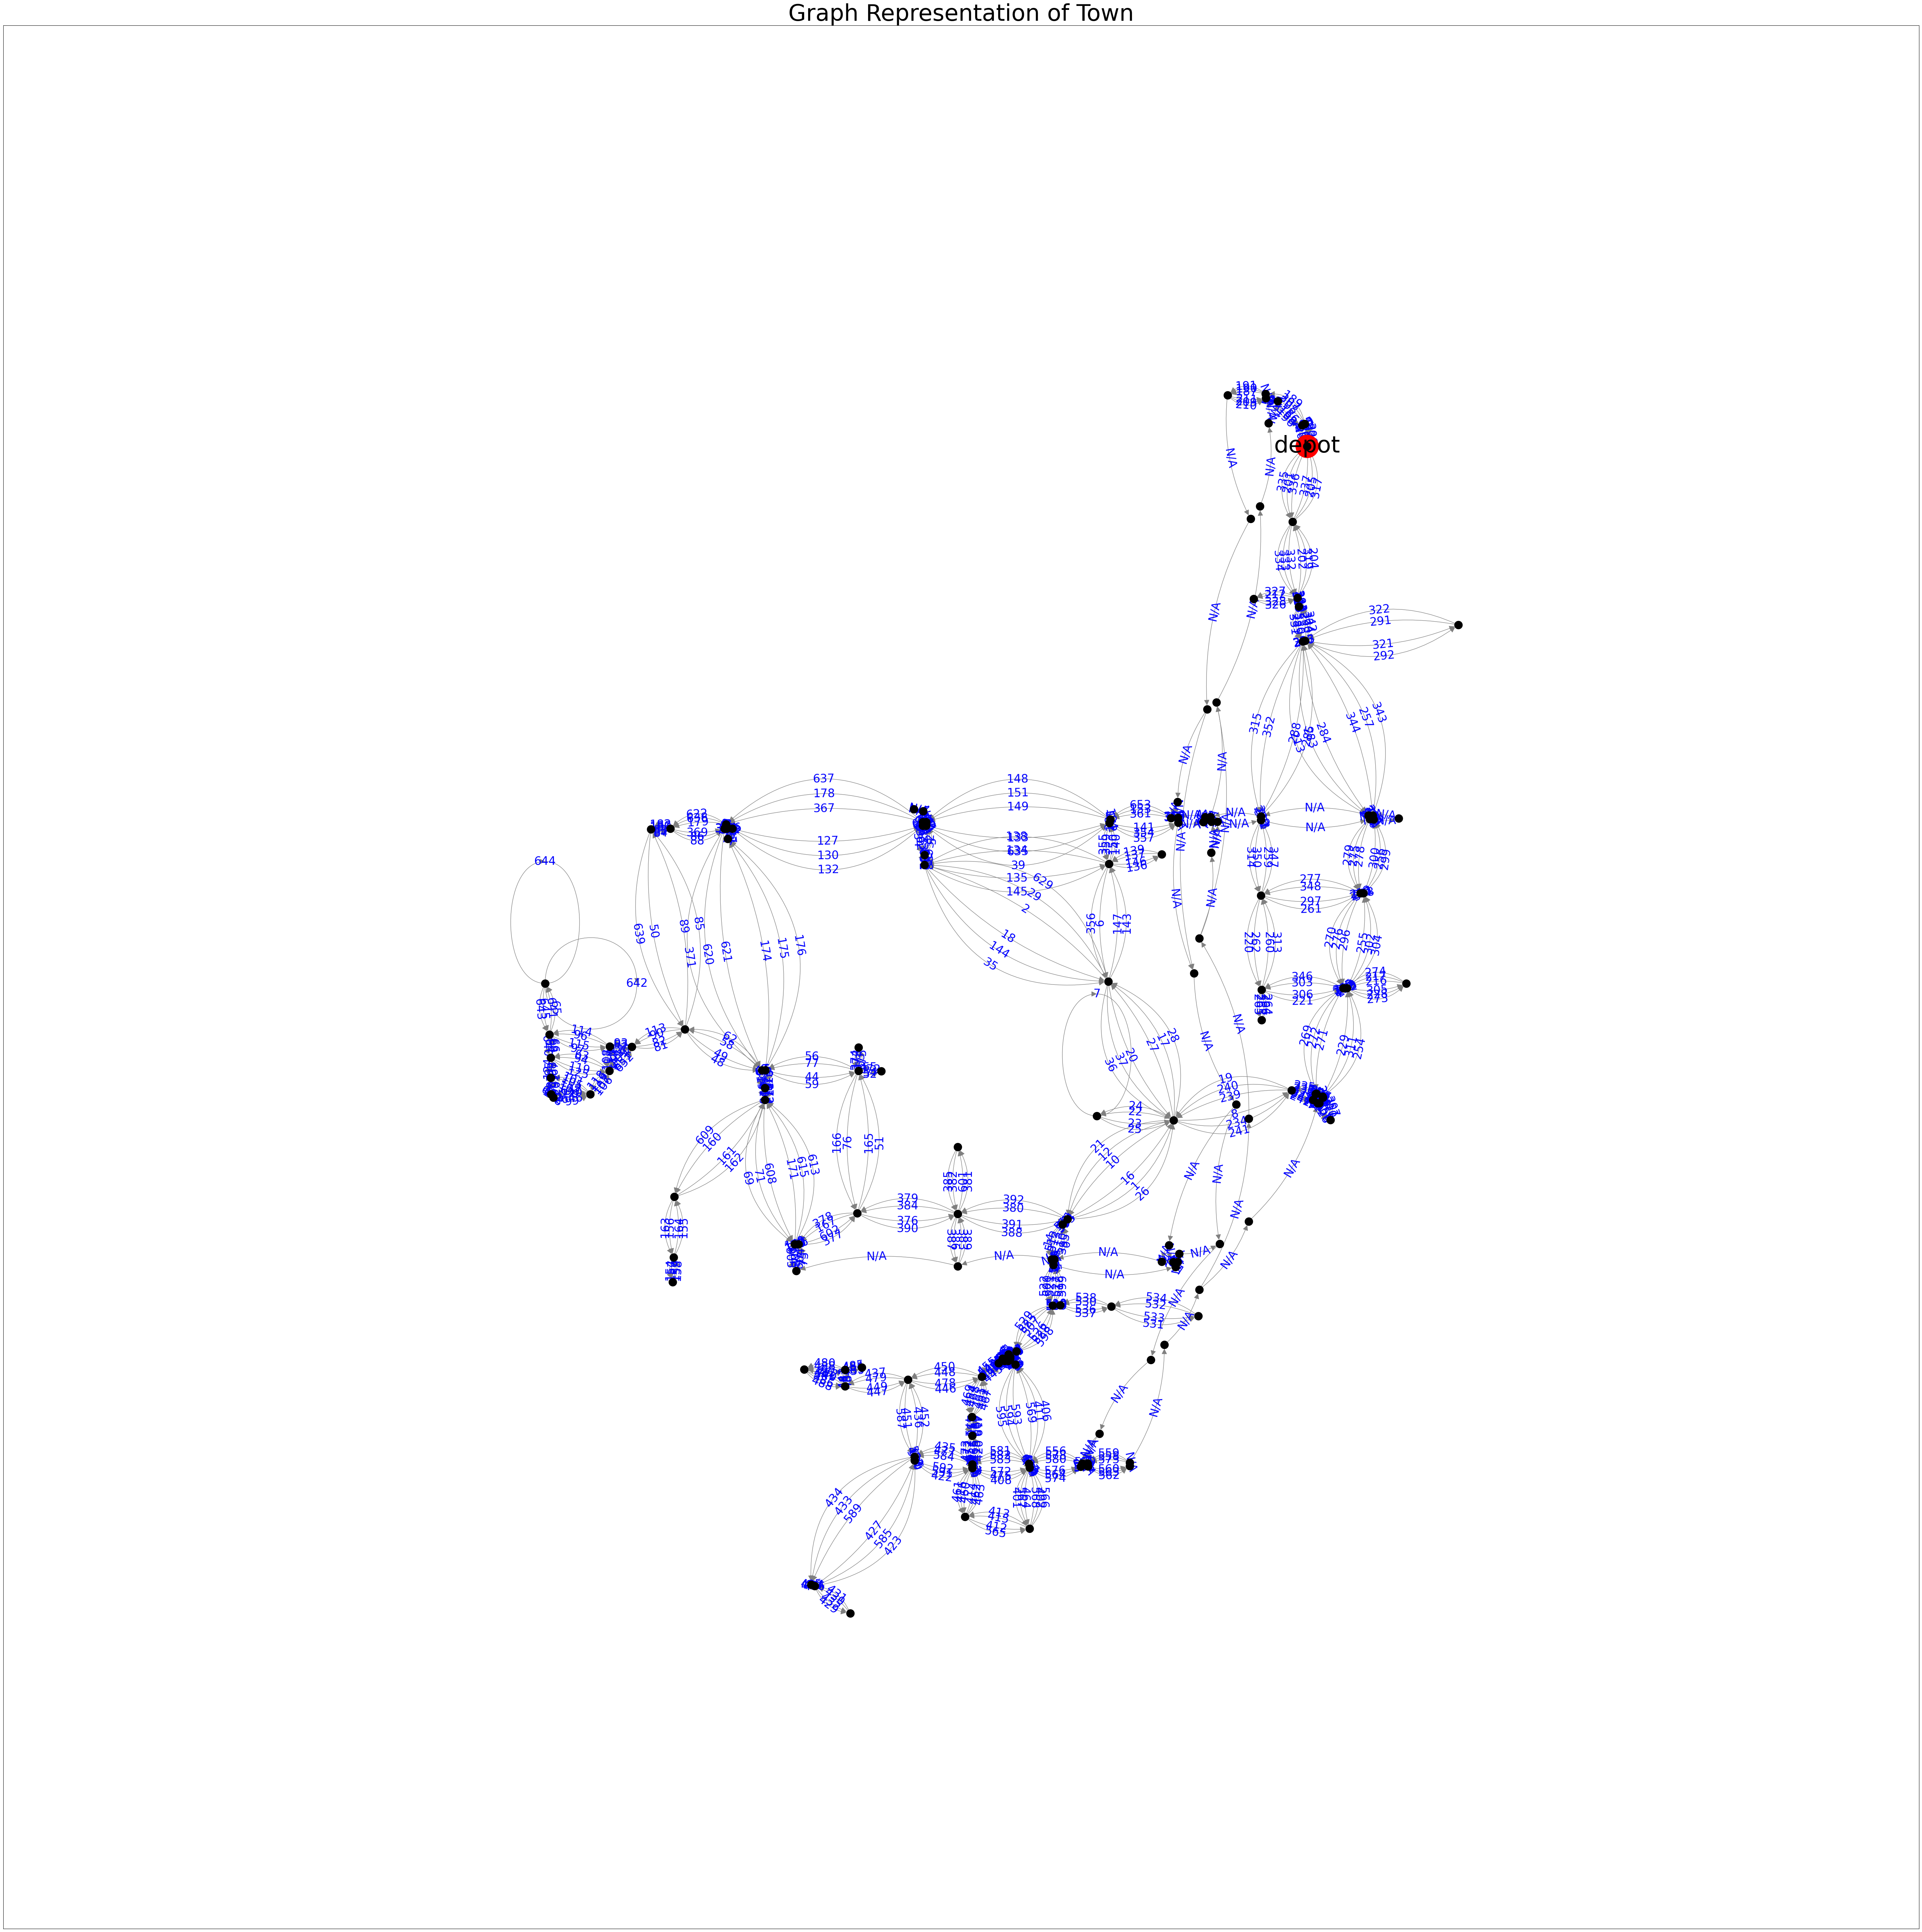

DONE


In [337]:
# 5. Plot final routes
G_graph = plotting.add_order_attribute(G, sol.routes)
plotting.draw_labeled_multigraph(G_graph, 'order', size=(75,75), plotDepot=True)

print("DONE")

## Plot the routes using Folium

In [338]:
new_m = folium.Map(location=[43.1, -89.5], zoom_start=12)
count = 0
for i, edge in enumerate(full_route):
    edge_data = G.get_edge_data(edge[0], edge[1], edge[2])
        
    if edge_data is not None:
            
        if i < len(full_route)-1:
            edge_data_next = G.get_edge_data(full_route[i+1][0], full_route[i+1][1], full_route[i+1][2])
            if edge_data_next is not None and "name" in edge_data_next and "name" in edge_data:
                if edge_data_next["name"] == edge_data["name"]:
                    continue
        lstring = edge_data['geometry']
        # swap long lat to lat long
        lstring = lstring.__class__([(y, x) for x, y in lstring.coords])
        midpoint = len(list(lstring.coords))//2
        icon_number = folium.plugins.BeautifyIcon(
            border_color="#00ABDC",
            border_width=1,
            text_color="#00ABDC",
            number=count,
            inner_icon_style="margin-top:2;",
        )
        folium.PolyLine(locations=lstring.coords, color='blue', weight=1, tooltip=edge_data).add_to(new_m)
        folium.Marker(location=lstring.coords[midpoint], popup=f"Edge {count}", icon=icon_number).add_to(new_m)
        count += 1
new_m